In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings

In [67]:
df = pd.read_csv('ola.csv')

df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [68]:
df.drop(columns='Unnamed: 0', inplace=True)

In [69]:
df.shape

(19104, 13)

In [70]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MMM-YY,19104,24,01/01/19,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver_ID,19104.0,NaN,NaN,NaN,1415.591133,810.705321,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,NaN,NaN,NaN,34.668435,6.257912,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,NaN,NaN,NaN,0.418749,0.493367,0.0,0.0,0.0,1.0,1.0
City,19104,29,C20,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,19104.0,NaN,NaN,NaN,1.021671,0.800167,0.0,0.0,1.0,2.0,2.0
Income,19104.0,NaN,NaN,NaN,65652.025126,30914.515344,10747.0,42383.0,60087.0,83969.0,188418.0
Dateofjoining,19104,869,23/07/15,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastWorkingDate,1616,493,29/07/20,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joining Designation,19104.0,NaN,NaN,NaN,1.690536,0.836984,1.0,1.0,1.0,2.0,5.0


In [71]:
np.round(100 * df.isna().sum()/len(df),2)

MMM-YY                   0.00
Driver_ID                0.00
Age                      0.32
Gender                   0.27
City                     0.00
Education_Level          0.00
Income                   0.00
Dateofjoining            0.00
LastWorkingDate         91.54
Joining Designation      0.00
Grade                    0.00
Total Business Value     0.00
Quarterly Rating         0.00
dtype: float64

In [72]:
warnings.filterwarnings("ignore")

In [73]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [74]:
df.rename(columns = {'MMM-YY':'Reporting'}, inplace=True)

In [75]:
df['Label'] = df['LastWorkingDate'].notna().apply(lambda x: 1 if x == True else 0)
df.head()

,Reporting,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Label
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0


In [76]:
df['Label'].value_counts()

Label
0    17488
1     1616
Name: count, dtype: int64

In [77]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputed_cols = df[['Age', 'Gender']].values

imputer.fit(imputed_cols)

df[['Age', 'Gender']] = imputer.transform(imputed_cols)

In [78]:
np.round(100 * df.isna().sum()/len(df),2)

Reporting                0.00
Driver_ID                0.00
Age                      0.00
Gender                   0.00
City                     0.00
Education_Level          0.00
Income                   0.00
Dateofjoining            0.00
LastWorkingDate         91.54
Joining Designation      0.00
Grade                    0.00
Total Business Value     0.00
Quarterly Rating         0.00
Label                    0.00
dtype: float64

In [79]:
final_df = pd.DataFrame()

final_df['Driver_ID'] = df['Driver_ID'].unique()

final_df.shape

(2381, 1)

In [80]:
df.head()

,Reporting,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Label
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0


In [81]:
final_df['Age'] = df.groupby('Driver_ID', axis=0).max('Reporting')['Age'].round().tolist()

final_df['Gender'] = list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])

final_df['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])

final_df['Educational_Level'] = list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])

final_df['Income'] = list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])

final_df['Dateofjoining'] = list(df.groupby('Driver_ID').agg({'Dateofjoining':'first'})['Dateofjoining'])

final_df['Joining Designation'] = list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])

final_df['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])

final_df['Total_Business_Value'] = list(df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])


final_df['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

final_df['Attrition'] = list(df.groupby('Driver_ID',axis=0).sum('Label')['Label'])

In [82]:
#Rating Increase

first_quarter = df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "first"})

last_quarter = df.groupby(["Driver_ID"]).agg({"Quarterly Rating": "last"})

qr = (last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"]).reset_index()

final_df['Quarterly_Increase'] = qr.iloc[:,1].map({False:0, True:1})

In [83]:
#Income Increase
sal1 = df.groupby(['Driver_ID']).agg({'Income':'first'})

sal2 = df.groupby(['Driver_ID']).agg({'Income':'last'})

sal = (sal2['Income'] > sal1['Income']).reset_index()

final_df['Income_Increase'] = sal.iloc[:,1].map({False:0, True:1})

In [84]:
final_df['Income_Increase'].value_counts()

Income_Increase
0    2338
1      43
Name: count, dtype: int64

<Axes: >

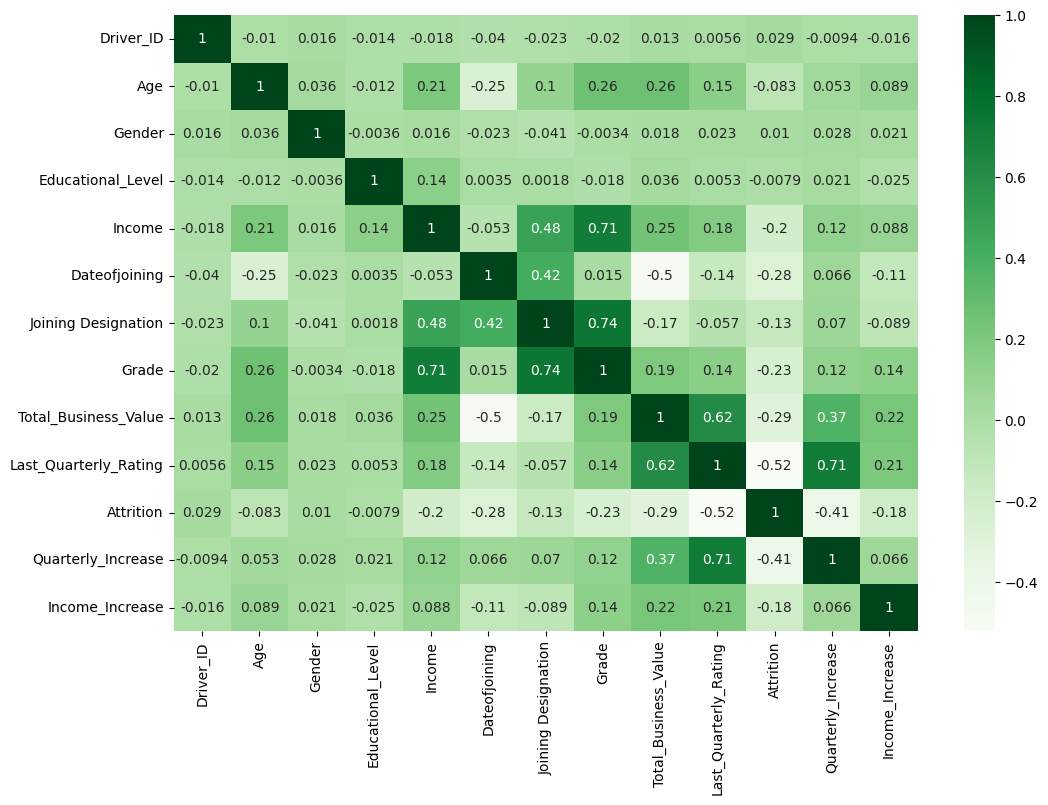

In [85]:
plt.figure(figsize=(12, 8))

sns.heatmap(final_df.drop(columns='City').corr(method='spearman'), annot=True, cmap='Greens')

* Not much colinearity exist.

In [86]:
final_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Age,2381.0,33.740865,21.0,30.0,33.0,37.0,58.0,5.918676
Gender,2381.0,0.411172,0.0,0.0,0.0,1.0,1.0,0.49215
Educational_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
Dateofjoining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.096598,1.0,1.0,2.0,3.0,5.0,0.941522
Total_Business_Value,2381.0,4586741.822764,-1385530.0,0.0,817680.0,4173650.0,95331060.0,9127115.313446
Last_Quarterly_Rating,2381.0,1.427971,1.0,1.0,1.0,2.0,4.0,0.809839


In [87]:
final_df['Year'] = final_df['Dateofjoining'].dt.year
final_df['Month'] = final_df['Dateofjoining'].dt.month
final_df['DayOfWeek'] = final_df['Dateofjoining'].dt.dayofweek

In [88]:
final_df.drop(columns='Dateofjoining', inplace=True)

In [89]:
final_df

,Driver_ID,Age,Gender,City,Educational_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Attrition,Quarterly_Increase,Income_Increase,Year,Month,DayOfWeek
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,1,0,0,2018,12,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0,2020,11,4
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,1,0,0,2019,12,5
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,1,0,0,2019,1,2
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1,0,2020,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,0,1,0,2015,10,3
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,1,0,0,2020,8,4
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,1,0,0,2018,7,1
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,1,0,0,2018,7,5


Univariate Analysis

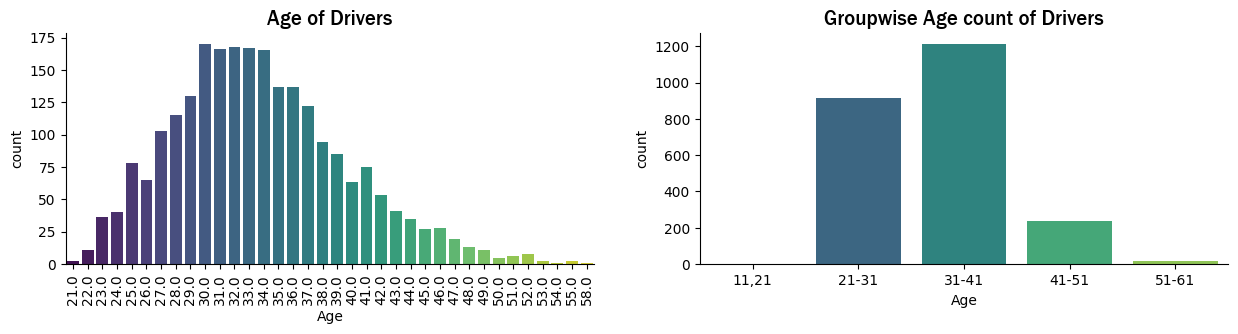

In [90]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(121)
sns.countplot(x=final_df['Age'],palette='viridis',width=0.8)
plt.title('Age of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(final_df.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

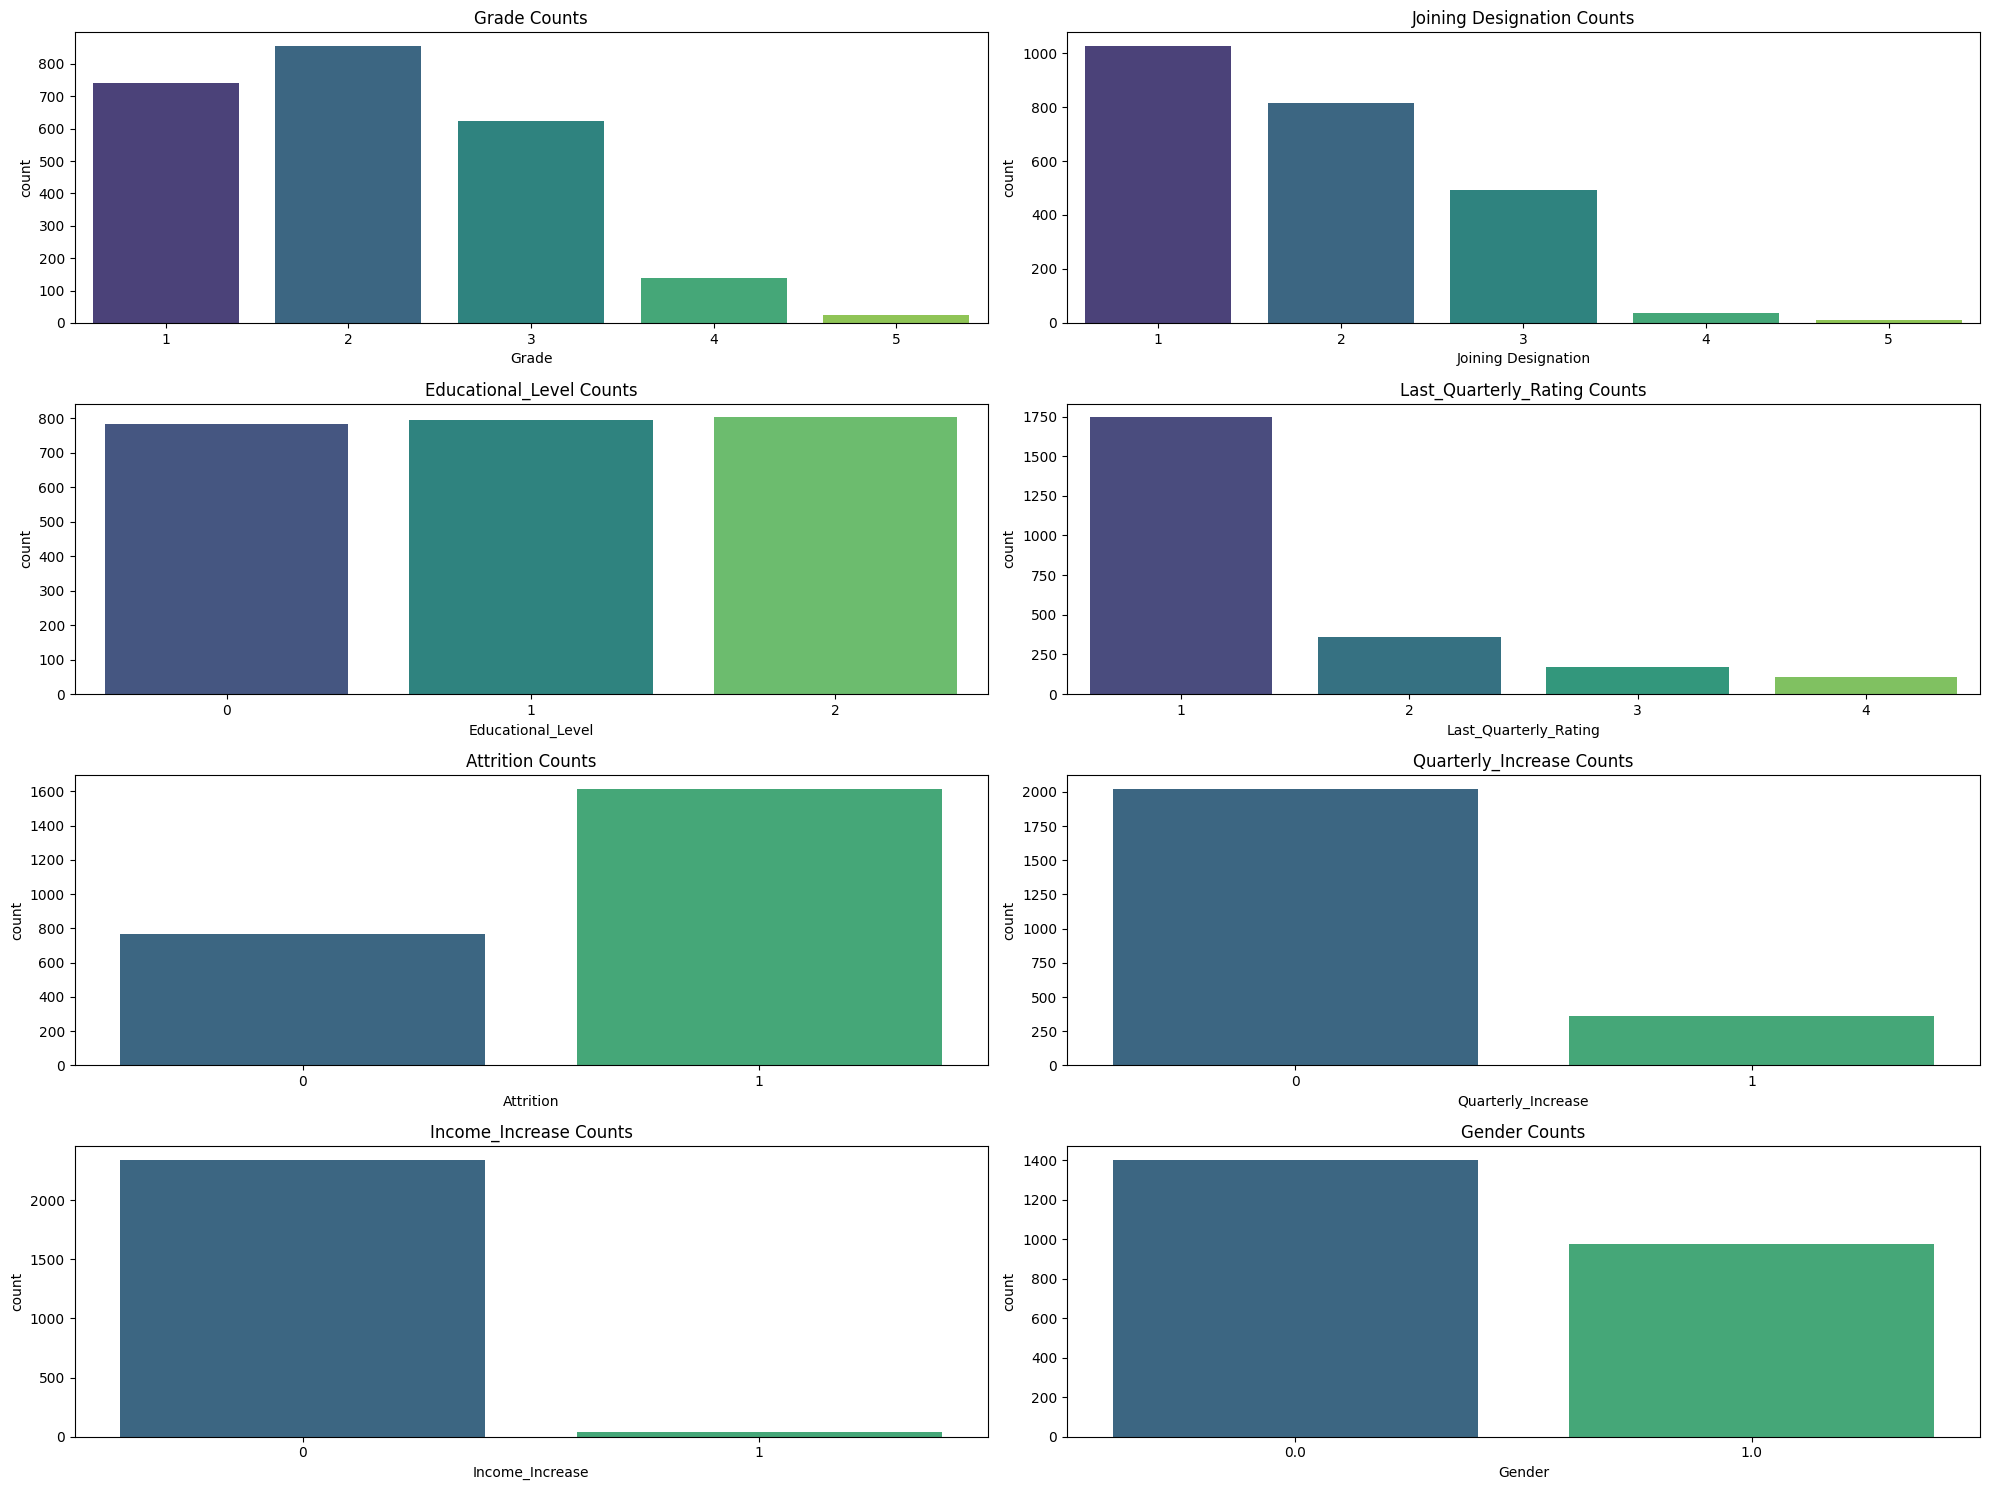

In [91]:
custom_palette = 'viridis'

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))


columns_to_plot = ['Grade', 'Joining Designation', 'Educational_Level', 'Last_Quarterly_Rating',
                   'Attrition', 'Quarterly_Increase', 'Income_Increase', 'Gender']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=final_df[col], palette=custom_palette)
    plt.title(f'{col} Counts')

plt.tight_layout()


plt.show()

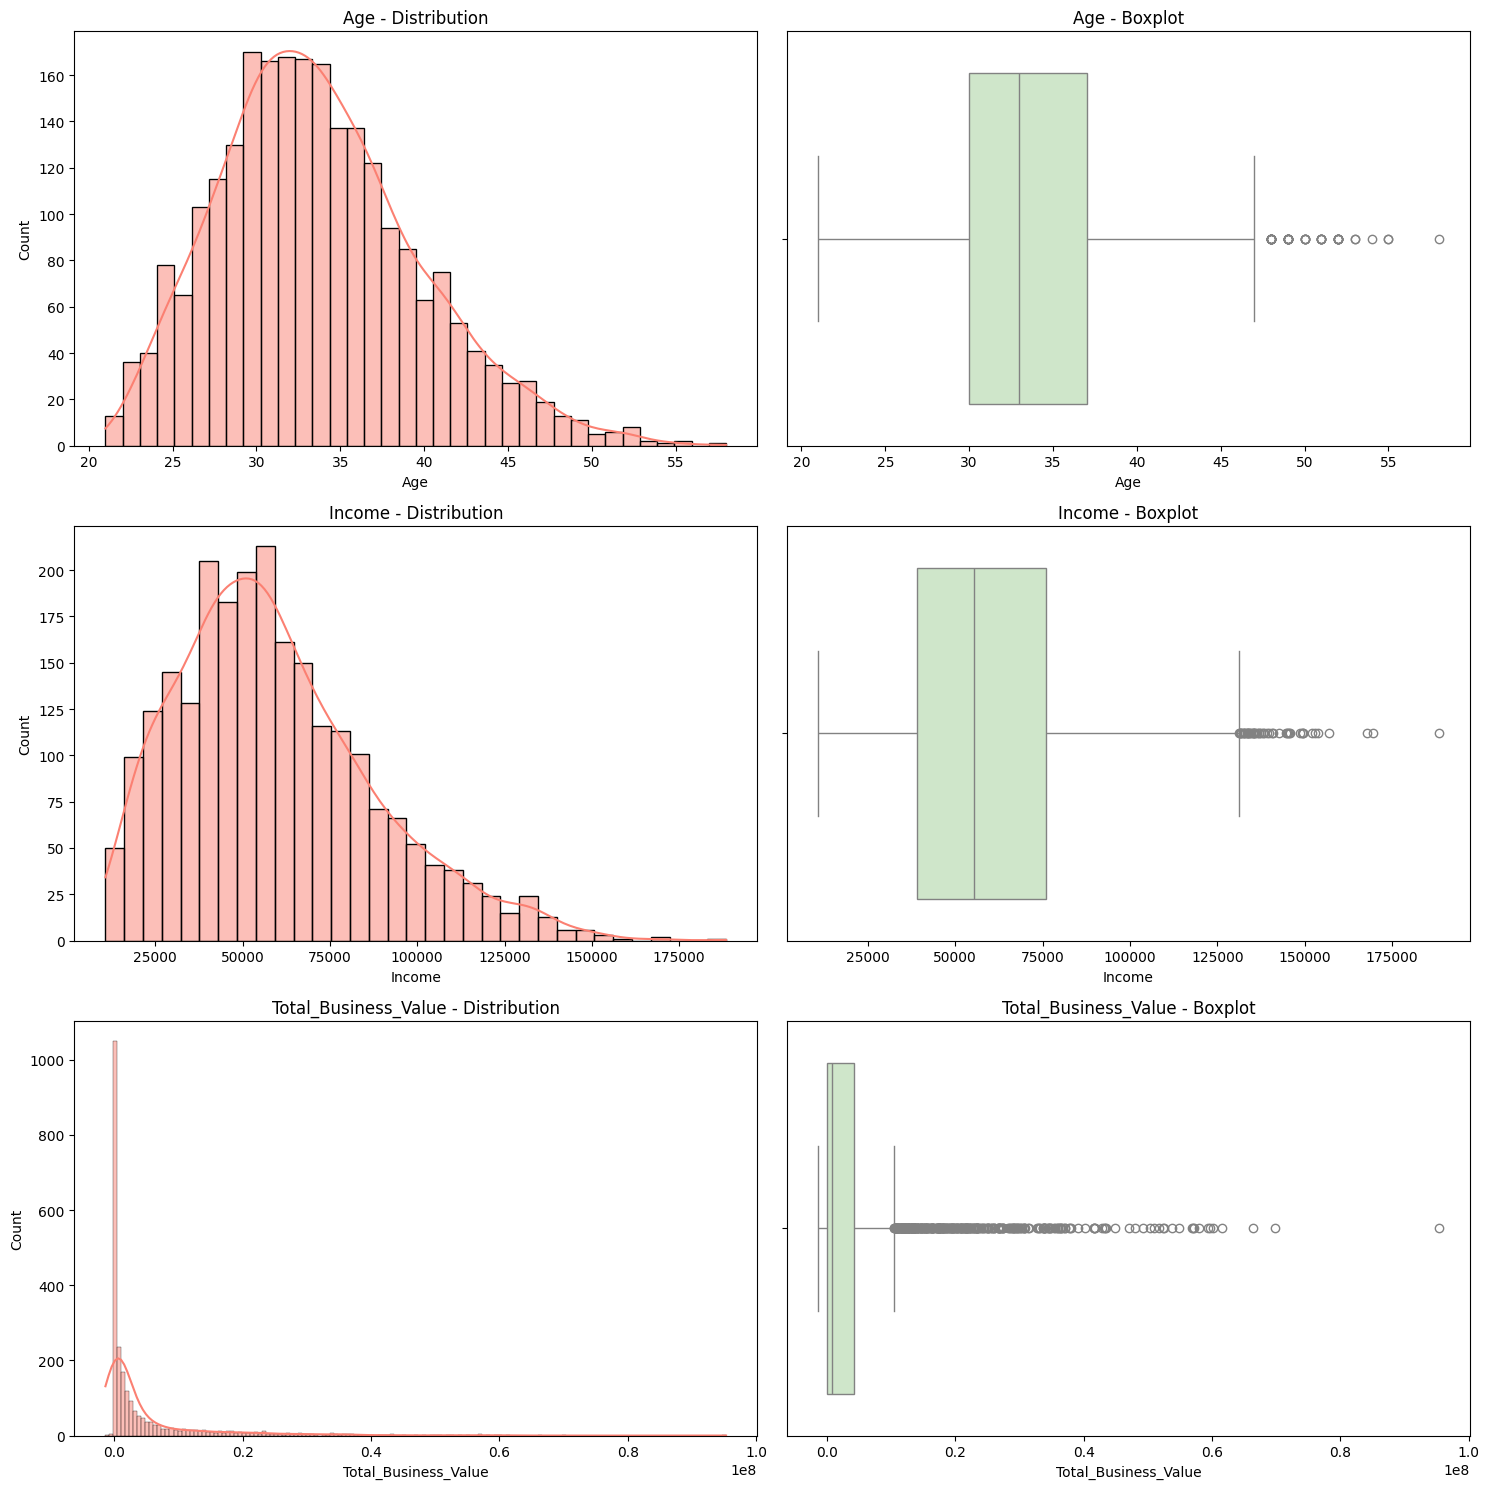

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

continue_cols = ['Age', 'Income', 'Total_Business_Value']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, col in enumerate(continue_cols):
    # Distribution plot (Histogram)
    sns.histplot(final_df[col], color="#fb8072", kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - Distribution')

    # Boxplot
    sns.boxplot(x=final_df[col], color="#ccebc5", ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()


plt.show()


** Total Business Value is highly affected by outliers resulted in skewness of the data.

** Age have few outliers.

** Income have outliers.

** Capping all the outliers. 

In [93]:
def capping(x):
    iqr = x.quantile(0.75) - x.quantile(0.25)

    uppers =  x.quantile(0.75) + 1.5*iqr

    lowers = x.quantile(0.25) - 1.5*iqr

    z = np.where(x > uppers, uppers, np.where(x < lowers, lowers, x))

    return z

In [94]:
for col in continue_cols:
    final_df[col] = capping(final_df[col])

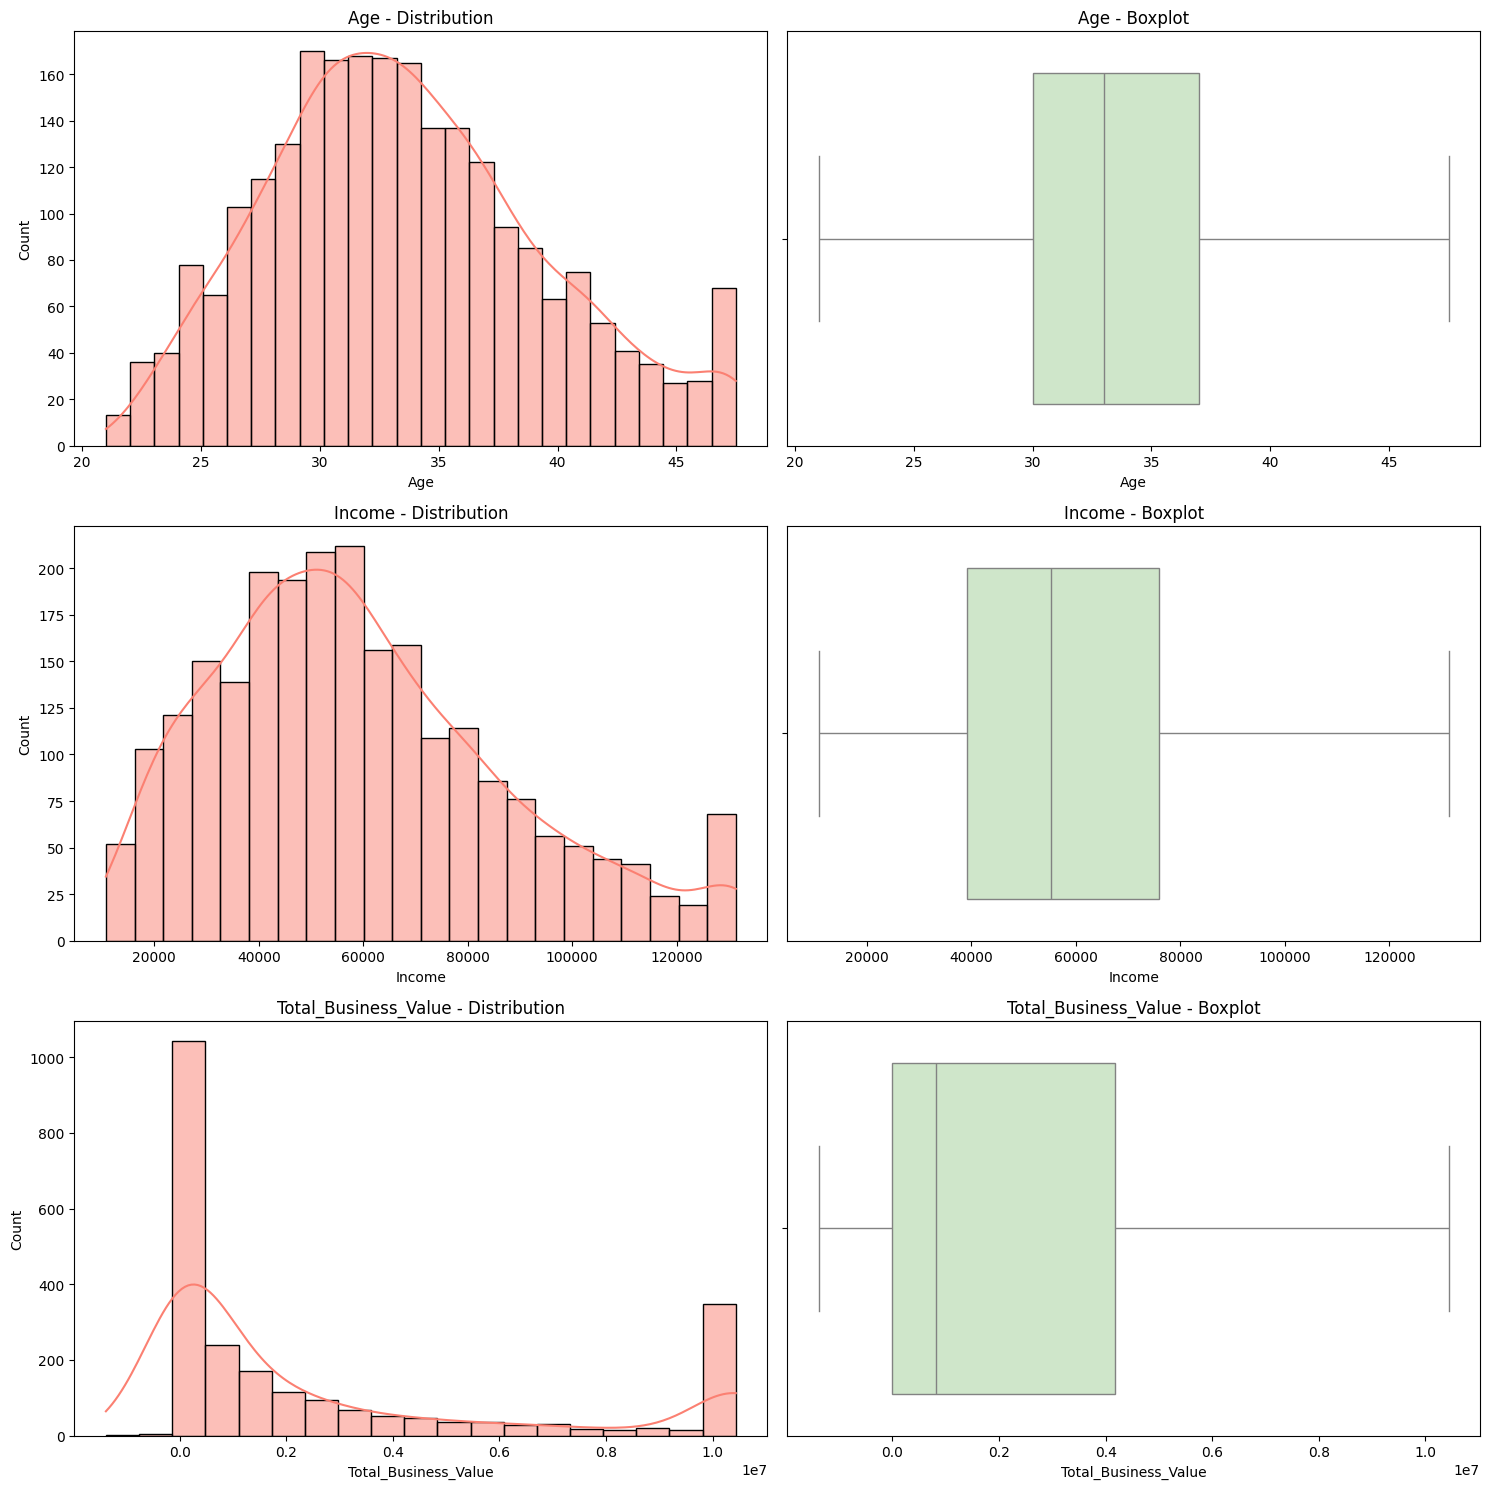

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, col in enumerate(continue_cols):
    # Distribution plot (Histogram)
    sns.histplot(final_df[col], color="#fb8072", kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - Distribution')

    # Boxplot
    sns.boxplot(x=final_df[col], color="#ccebc5", ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()


plt.show()


In [105]:
final_df

,Driver_ID,Age,Gender,City,Educational_Level,Income,Joining Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Attrition,Quarterly_Increase,Income_Increase,Year,Month,DayOfWeek
0,1,28.0,0.0,C23,2,57387.0,1,1,1715580.0,2,1,0,0,2018,12,0
1,2,31.0,0.0,C7,2,67016.0,2,2,0.0,1,0,0,0,2020,11,4
2,4,43.0,0.0,C13,2,65603.0,2,2,350000.0,1,1,0,0,2019,12,5
3,5,29.0,0.0,C9,0,46368.0,1,1,120360.0,1,1,0,0,2019,1,2
4,6,31.0,1.0,C11,1,78728.0,3,3,1265000.0,2,0,1,0,2020,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815.0,2,3,10434125.0,4,0,1,0,2015,10,3
2377,2785,34.0,1.0,C9,0,12105.0,1,1,0.0,1,1,0,0,2020,8,4
2378,2786,45.0,0.0,C19,0,35370.0,2,2,2815090.0,1,1,0,0,2018,7,1
2379,2787,28.0,1.0,C20,2,69498.0,1,1,977830.0,1,1,0,0,2018,7,5


In [107]:
X = final_df.iloc[:,1:].drop(columns='Attrition')
y = final_df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [113]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score,
    r2_score, precision_recall_curve, precision_score, recall_score, roc_curve, auc, average_precision_score)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline

In [114]:
s1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), ['City'])
], remainder='passthrough')

s2 = StandardScaler()

# Define SMOTE separately
s3 = SMOTE(sampling_strategy='auto', random_state=42)

In [115]:
def pipe(s4, param_grid):
    pipeline = ImbPipeline([
        ('ColumnTransformer', s1),
        ('scaler', s2),
        ('smote', s3),  # Use SMOTE directly in the imbalanced-learn Pipeline
        ('classifier', s4)
    ])



    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_

    return best_model

In [118]:
def metrics(y_test, preds):
    print('Test F1 Score : ', round(f1_score(y_test, preds), 2))
    print('\n')
    print(classification_report(y_test, preds))

    auprc = average_precision_score(y_test, preds)

    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = np.trapz(tpr, fpr)  # Calculate ROC AUC

    # Generate PRC curve data
    precision, recall, _ = precision_recall_curve(y_test, preds)

    plt.figure(figsize=(16, 6))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='red', marker='.', label='PR curve (area = %0.2f)' % auprc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()


Bagging

Test F1 Score :  0.9


              precision    recall  f1-score   support

           0       0.78      0.85      0.81       160
           1       0.92      0.88      0.90       317

    accuracy                           0.87       477
   macro avg       0.85      0.87      0.86       477
weighted avg       0.87      0.87      0.87       477



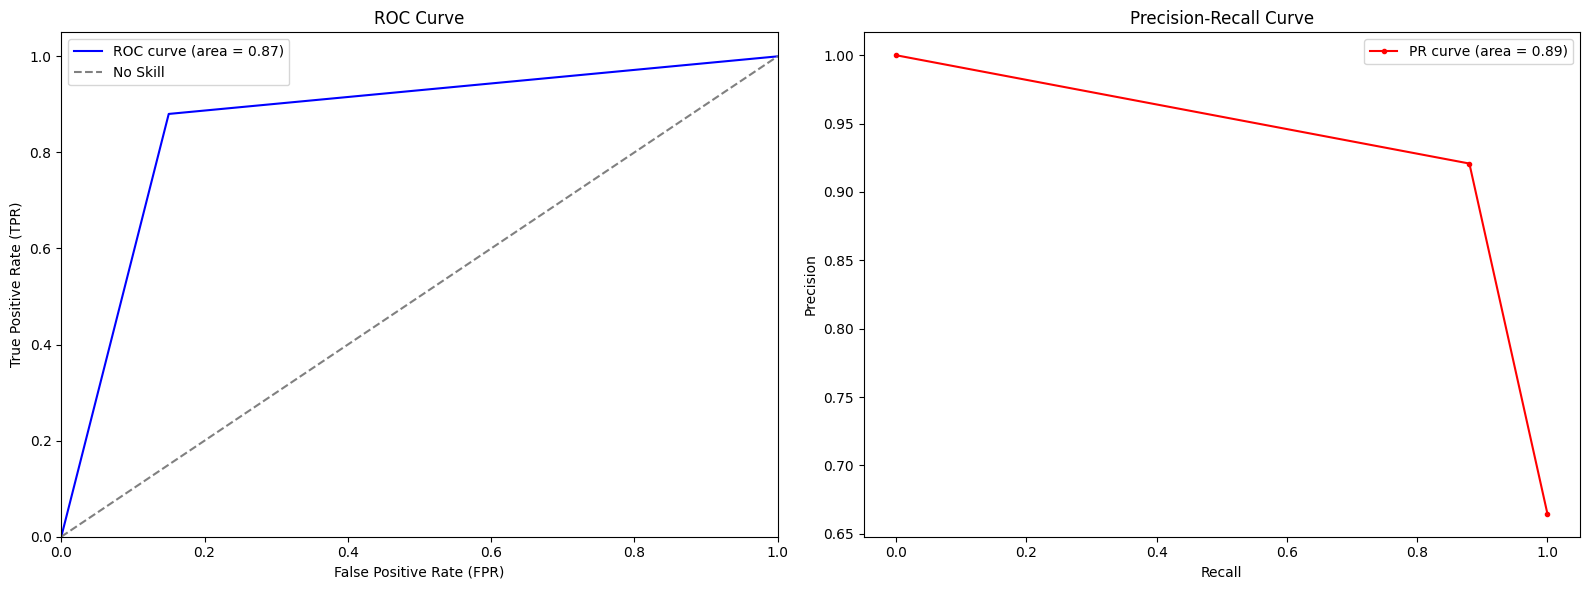

In [122]:
s4 = RandomForestClassifier()
param_grid = {
    'classifier__n_estimators': [50, 100, 200],            # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],            # Maximum depth of each tree
    'classifier__min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],              # Minimum samples required to be in a leaf node
    'classifier__max_features': ['sqrt', 'log2', None],    # Number of features to consider for the best split
    'classifier__bootstrap': [True, False]                  # Whether to bootstrap samples
}
model = pipe(s4, param_grid)

preds = model.predict(x_test)

metrics(preds=preds, y_test=y_test)


Boosting

Test F1 Score :  0.91


              precision    recall  f1-score   support

           0       0.79      0.86      0.83       160
           1       0.93      0.89      0.91       317

    accuracy                           0.88       477
   macro avg       0.86      0.87      0.87       477
weighted avg       0.88      0.88      0.88       477



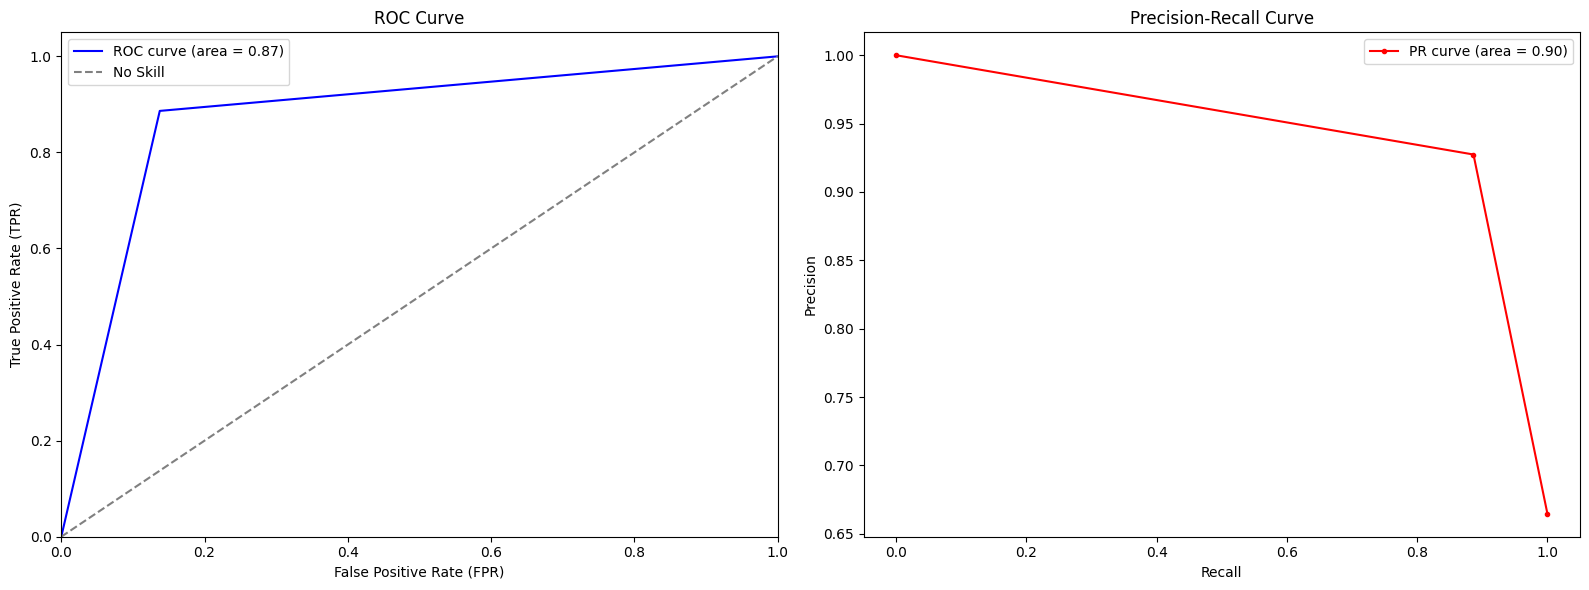

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

s4 = GradientBoostingClassifier()

gbm_params = {
    'classifier__learning_rate': [0.07, 0.08],
    'classifier__max_depth': [1, 2, 3],
    'classifier__n_estimators': [10, 20, 30, 40, 50],
    'classifier__subsample': [0.5, 0.6],
    'classifier__min_samples_split': range(12, 16),
    'classifier__min_samples_leaf': range(14, 19),
    'classifier__max_features': [7, 10, 13]
}
model = pipe(s4, gbm_params)

preds = model.predict(x_test)

metrics(preds=preds, y_test=y_test)

Test F1 Score :  0.91


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       160
           1       0.93      0.88      0.91       317

    accuracy                           0.88       477
   macro avg       0.86      0.88      0.87       477
weighted avg       0.89      0.88      0.88       477



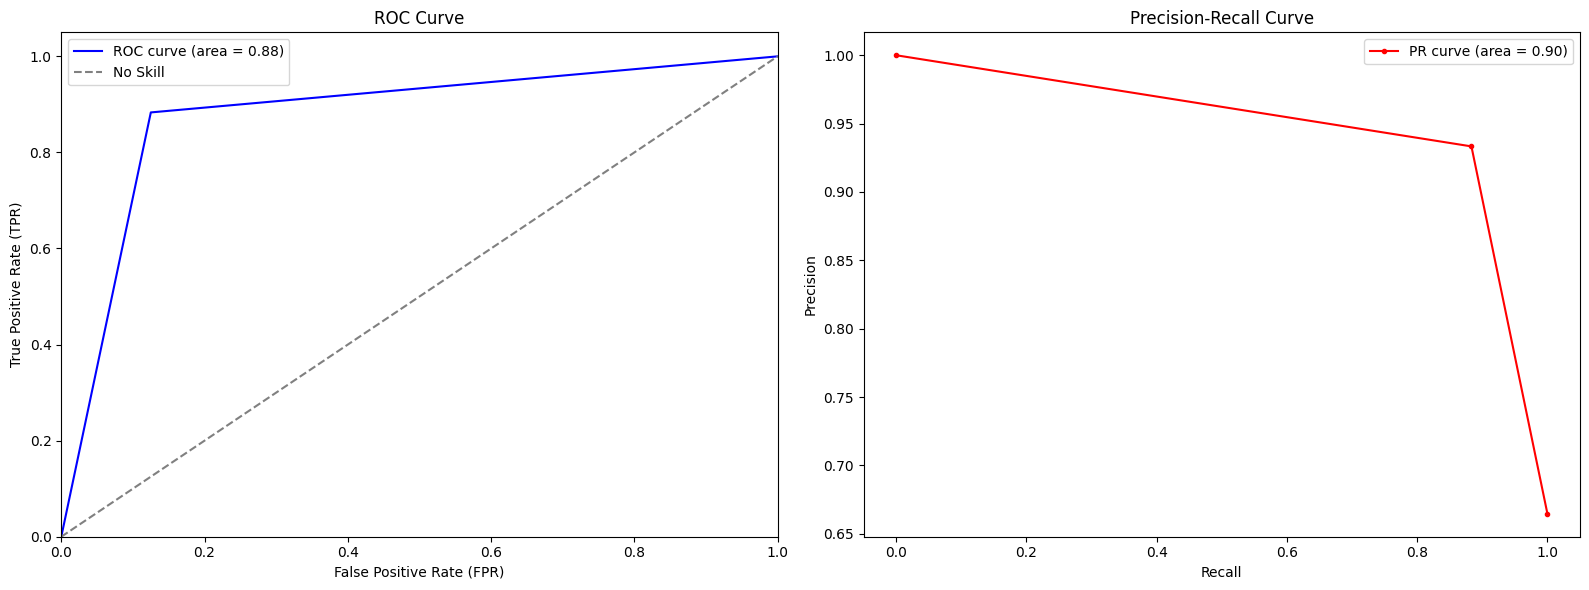

In [125]:
from xgboost import XGBClassifier

# Define the XGBoost classifier
s8 = XGBClassifier()

# Define the parameter grid for XGBoost
xgb_params = {
    'classifier__learning_rate': [0.07, 0.08],
    'classifier__max_depth': [1, 2, 3],
    'classifier__n_estimators': [10, 20, 30, 40, 50],
    'classifier__subsample': [0.5, 0.6],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__colsample_bytree': [0.5, 0.6, 0.7],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [1, 1.5, 2]
}
model = pipe(s8, xgb_params)

preds = model.predict(x_test)

metrics(preds=preds, y_test=y_test)

Insights
1. An F1 score of 0.91 suggests a very effective model for predicting employee attrition. 
2. With a high F1 score, can be confident that the employees your model identifies as likely to leave are actually at risk.
3. The model is excellent at identifying employees who are likely to leave (high precision and recall for class 1).
4. The model also performs well at identifying employees who are likely to stay (good precision and recall for class 0).
5. There might be a slight bias towards identifying departing employees due to the higher F1 score for class 1 compared to class 0. This could be because there are more     employees who leave (317) compared to those who stay (160) in data.

Recommendations
1. Use the model to proactively target employees with a high risk of leaving (predicted as class 1 with high confidence) with retention strategies.
2. Avoid imbalanced data for an unbiassed model.
3. Accurately predicting employee departures allows for better workforce planning. Can anticipate replacements and minimize disruptions caused by unexpected vacancies.
4. Understanding the factors influencing employee departures can help identify areas for improvement in the work environment and employee development programs.